Garcia-Ojalvo J, Elowitz MB, Strogatz SH. Modeling a synthetic multicellular clock: repressilators coupled by quorum sensing. Proc Natl Acad Sci U S A. 2004;101(30):10955-10960. doi:10.1073/pnas.0307095101

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import collections
import numpy.fft as fft
import collections
from scipy.signal import find_peaks

## Figure n°2 - Frequency histogram and time evolution of bi(t) for 10 cells and increasing cell density

In [2]:
### Constant values
nCell = 10000 # Number of cells to use
n = 2 # Hill coefficient
alpha = 111 # Transcription rate in the absence of repressor
kappa = 20 # Maximal contribution to lacI transcription in the presence of saturating amounts of AI
k_s0 = 1 
k_s1 = 0.01
t = 600 # Time during which the modelisation will be done
eta = 2 # Diffusion rate of AI across the cell membrane
beta = [] # List of beta values of cells
for i in range(nCell):
    beta.append(random.gauss(1, 0.05))
tau = 0.33 # Time interval 

### MODELISATION WITH RUNGE-KUTTA'S METHOD

In [3]:
Q = 0.4 # Control parameter which depends on cellular density

10000


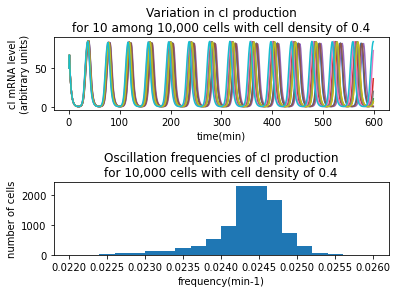

In [4]:
a = np.zeros((nCell, t))
b = np.zeros((nCell, t))
c = np.zeros((nCell, t))

A = np.zeros((nCell, t))
B = np.zeros((nCell, t))
C = np.zeros((nCell, t))

S = np.zeros((nCell, t))
Se = np.zeros((nCell, t))

a[:,0] = 0
b[:,0] = 50
c[:,0] = 0

A[:,0] = 0
B[:,0] = 0
C[:,0] = 0

S[:,0] = 0
Se[:,0] = 0

frequence_list = []

time = np.arange(0,t)

for j in range(0, t-1):
    for i in range(0, nCell):
        Se[i, j] = Q * np.mean(S[:, j])

        abis = a[i,j] + tau/2 *(-a[i,j]+(alpha/(1+C[i,j]**n)))
        bbis = b[i,j] + tau/2 *(-b[i,j]+(alpha/(1+A[i,j]**n)))
        cbis = c[i,j] + tau/2 *(-c[i,j]+(alpha/(1+B[i,j]**n))+(kappa*S[i,j]/1+S[i,j]))

        Abis = A[i, j] + tau/2 * (beta[i] * (a[i, j] - A[i, j]))
        Bbis = B[i, j] + tau/2 * (beta[i] * (b[i, j] - B[i, j]))
        Cbis = C[i, j] + tau/2 * (beta[i] * (c[i, j] - C[i, j]))

        Sbis = S[i, j] + tau/2 * ((-k_s0 * S[i, j]) + (k_s1 * A[i, j]) - (eta * (S[i, j] - Se[i, j])))

        a[i,j+1] = a[i,j] + tau *(-abis+(alpha/(1+Cbis**n)))
        b[i,j+1] = b[i,j] + tau *(-bbis+(alpha/(1+Abis**n)))
        c[i,j+1] = c[i,j] + tau *(-cbis+(alpha/(1+Bbis**n))+(kappa*Sbis/1+Sbis))

        A[i,j+1] = A[i, j]+ tau*(beta[i]*(abis-Abis))
        B[i,j+1] = B[i, j]+ tau*(beta[i]*(bbis-Bbis))
        C[i,j+1] = C[i, j]+ tau*(beta[i]*(cbis-Cbis))

        S[i,j+1] = S[i,j]+tau*((-k_s0*Sbis)+(k_s1*Abis)-(eta*(Sbis-Se[i,j])))

tot_freq=[]
for i in range(nCell):
    #plt.plot(time,b[i])

    peaks, _ = find_peaks(b[i])
    peaks_l, _ = find_peaks(-b[i])
    periods = []
    freqs = []
    n = 0
    for x in peaks :
        if n < len(peaks)-1 and n < len(peaks_l)-1:
            period = peaks[n+1]-peaks[n]
            period_l = peaks_l[n+1]-peaks_l[n]
            freqs.append(period)
            freqs.append(period_l)
        else :
            break
        n+=1
    tot_freq.append(1/np.mean(freqs))


fig, axs = plt.subplots(2)
fig.subplots_adjust(hspace= 1)


cellplot = [random.randint(0,nCell-1) for p in range(0,10)]
for i in cellplot :
    #plt.plot(time, b[i])
    axs[0].plot(time, b[i])
    axs[0].set_title('Variation in cI production' + '\n'+'for 10 among 10,000 cells with cell density of ' + str(Q))
    axs[0].set_ylabel('cI mRNA level' +'\n'+'(arbitrary units)')
    axs[0].set_xlabel('time(min)')

print(len(tot_freq))

#plt.hist(tot_freq, bins = 50, range =(0.02,0.03))
axs[1].hist(tot_freq, bins = 20, range =(0.022,0.026))
axs[1].set_title('Oscillation frequencies of cI production' + '\n' + 'for 10,000 cells with cell density of ' + str(Q))
axs[1].set_ylabel('number of cells')
axs[1].set_xlabel('frequency(min-1)')
plt.savefig("./rungekutta_alpha_"+str(alpha)+"_b_"+str(b[0,0])+"_q_"+str(Q)+".jpg")

In [5]:
Q = 0.63

10000


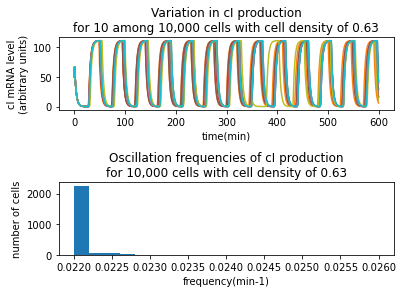

In [6]:
a = np.zeros((nCell, t))
b = np.zeros((nCell, t))
c = np.zeros((nCell, t))

A = np.zeros((nCell, t))
B = np.zeros((nCell, t))
C = np.zeros((nCell, t))

S = np.zeros((nCell, t))
Se = np.zeros((nCell, t))

a[:,0] = 0
b[:,0] = 50
c[:,0] = 0

A[:,0] = 0
B[:,0] = 0
C[:,0] = 0

S[:,0] = 0
Se[:,0] = 0

frequence_list = []

time = np.arange(0,t)

for j in range(0, t-1):
    for i in range(0, nCell):
        Se[i, j] = Q * np.mean(S[:, j])

        abis = a[i,j] + tau/2 *(-a[i,j]+(alpha/(1+C[i,j]**n)))
        bbis = b[i,j] + tau/2 *(-b[i,j]+(alpha/(1+A[i,j]**n)))
        cbis = c[i,j] + tau/2 *(-c[i,j]+(alpha/(1+B[i,j]**n))+(kappa*S[i,j]/1+S[i,j]))

        Abis = A[i, j] + tau/2 * (beta[i] * (a[i, j] - A[i, j]))
        Bbis = B[i, j] + tau/2 * (beta[i] * (b[i, j] - B[i, j]))
        Cbis = C[i, j] + tau/2 * (beta[i] * (c[i, j] - C[i, j]))

        Sbis = S[i, j] + tau/2 * ((-k_s0 * S[i, j]) + (k_s1 * A[i, j]) - (eta * (S[i, j] - Se[i, j])))

        a[i,j+1] = a[i,j] + tau *(-abis+(alpha/(1+Cbis**n)))
        b[i,j+1] = b[i,j] + tau *(-bbis+(alpha/(1+Abis**n)))
        c[i,j+1] = c[i,j] + tau *(-cbis+(alpha/(1+Bbis**n))+(kappa*Sbis/1+Sbis))

        A[i,j+1] = A[i, j]+ tau*(beta[i]*(abis-Abis))
        B[i,j+1] = B[i, j]+ tau*(beta[i]*(bbis-Bbis))
        C[i,j+1] = C[i, j]+ tau*(beta[i]*(cbis-Cbis))

        S[i,j+1] = S[i,j]+tau*((-k_s0*Sbis)+(k_s1*Abis)-(eta*(Sbis-Se[i,j])))

tot_freq=[]
for i in range(nCell):
    #plt.plot(time,b[i])

    peaks, _ = find_peaks(b[i])
    peaks_l, _ = find_peaks(-b[i])
    periods = []
    freqs = []
    n = 0
    for x in peaks :
        if n < len(peaks)-1 and n < len(peaks_l)-1:
            period = peaks[n+1]-peaks[n]
            period_l = peaks_l[n+1]-peaks_l[n]
            freqs.append(period)
            freqs.append(period_l)
        else :
            break
        n+=1
    tot_freq.append(1/np.mean(freqs))


fig, axs = plt.subplots(2)
fig.subplots_adjust(hspace= 1)


cellplot = [random.randint(0,nCell-1) for p in range(0,10)]
for i in cellplot :
    #plt.plot(time, b[i])
    axs[0].plot(time, b[i])
    axs[0].set_title('Variation in cI production' + '\n'+'for 10 among 10,000 cells with cell density of ' + str(Q))
    axs[0].set_ylabel('cI mRNA level' +'\n'+'(arbitrary units)')
    axs[0].set_xlabel('time(min)')

print(len(tot_freq))

#plt.hist(tot_freq, bins = 50, range =(0.02,0.03))
axs[1].hist(tot_freq, bins = 20, range =(0.022,0.026))
axs[1].set_title('Oscillation frequencies of cI production' + '\n' + 'for 10,000 cells with cell density of ' + str(Q))
axs[1].set_ylabel('number of cells')
axs[1].set_xlabel('frequency(min-1)')
plt.savefig("./rungekutta_alpha_"+str(alpha)+"_b_"+str(b[0,0])+"_q_"+str(Q)+".jpg")

In [7]:
Q = 0.8

10000


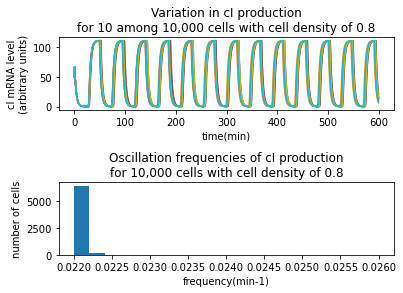

In [8]:
a = np.zeros((nCell, t))
b = np.zeros((nCell, t))
c = np.zeros((nCell, t))

A = np.zeros((nCell, t))
B = np.zeros((nCell, t))
C = np.zeros((nCell, t))

S = np.zeros((nCell, t))
Se = np.zeros((nCell, t))

a[:,0] = 0
b[:,0] = 50
c[:,0] = 0

A[:,0] = 0
B[:,0] = 0
C[:,0] = 0

S[:,0] = 0
Se[:,0] = 0

frequence_list = []

time = np.arange(0,t)

for j in range(0, t-1):
    for i in range(0, nCell):
        Se[i, j] = Q * np.mean(S[:, j])

        abis = a[i,j] + tau/2 *(-a[i,j]+(alpha/(1+C[i,j]**n)))
        bbis = b[i,j] + tau/2 *(-b[i,j]+(alpha/(1+A[i,j]**n)))
        cbis = c[i,j] + tau/2 *(-c[i,j]+(alpha/(1+B[i,j]**n))+(kappa*S[i,j]/1+S[i,j]))

        Abis = A[i, j] + tau/2 * (beta[i] * (a[i, j] - A[i, j]))
        Bbis = B[i, j] + tau/2 * (beta[i] * (b[i, j] - B[i, j]))
        Cbis = C[i, j] + tau/2 * (beta[i] * (c[i, j] - C[i, j]))

        Sbis = S[i, j] + tau/2 * ((-k_s0 * S[i, j]) + (k_s1 * A[i, j]) - (eta * (S[i, j] - Se[i, j])))

        a[i,j+1] = a[i,j] + tau *(-abis+(alpha/(1+Cbis**n)))
        b[i,j+1] = b[i,j] + tau *(-bbis+(alpha/(1+Abis**n)))
        c[i,j+1] = c[i,j] + tau *(-cbis+(alpha/(1+Bbis**n))+(kappa*Sbis/1+Sbis))

        A[i,j+1] = A[i, j]+ tau*(beta[i]*(abis-Abis))
        B[i,j+1] = B[i, j]+ tau*(beta[i]*(bbis-Bbis))
        C[i,j+1] = C[i, j]+ tau*(beta[i]*(cbis-Cbis))

        S[i,j+1] = S[i,j]+tau*((-k_s0*Sbis)+(k_s1*Abis)-(eta*(Sbis-Se[i,j])))

tot_freq=[]
for i in range(nCell):
    peaks, _ = find_peaks(b[i])
    peaks_l, _ = find_peaks(-b[i])
    periods = []
    freqs = []
    n = 0
    for x in peaks :
        if n < len(peaks)-1 and n < len(peaks_l)-1:
            period = peaks[n+1]-peaks[n]
            period_l = peaks_l[n+1]-peaks_l[n]
            freqs.append(period)
            freqs.append(period_l)
        else :
            break
        n+=1
    tot_freq.append(1/np.mean(freqs))


fig, axs = plt.subplots(2)
fig.subplots_adjust(hspace= 1)


cellplot = [random.randint(0,nCell-1) for p in range(0,10)]
for i in cellplot :
    axs[0].plot(time, b[i])
    axs[0].set_title('Variation in cI production' + '\n'+'for 10 among 10,000 cells with cell density of ' + str(Q))
    axs[0].set_ylabel('cI mRNA level' +'\n'+'(arbitrary units)')
    axs[0].set_xlabel('time(min)')

print(len(tot_freq))

axs[1].hist(tot_freq, bins = 20, range =(0.022,0.026))
axs[1].set_title('Oscillation frequencies of cI production' + '\n' + 'for 10,000 cells with cell density of ' + str(Q))
axs[1].set_ylabel('number of cells')
axs[1].set_xlabel('frequency(min-1)')
plt.savefig("./rungekutta_alpha_"+str(alpha)+"_b_"+str(b[0,0])+"_q_"+str(Q)+".jpg")

## Figure n°3 - Synchronization transition for increasing Q (a) and Δβ (b). Parameters are the same as those described for Fig. 2. 

In [9]:
def M(t, b, nCell):
    '''
    Calcul of M value which represent the average signal of cells over time.
    '''
    return 1/nCell * sum(b[0:nCell,t])

In [10]:
def R(t1, t2, b, nCell):
    '''
    Calcul of R value between 2 times. 
    R is a parameter that represents the synchronization of the model.
    '''
    M_values = []
    b_values = []
    
    for t in range(t1, t2):
        M_values.append(M(t, b, nCell))
    
    num = np.mean(np.power(M_values,2)) - np.power(np.mean(M_values),2)

    for i in range(0, nCell):
        bi2_values = []
        b2i_values = []
        b2i_values.append(b[i,t1:t2]**2)
        bi2_values.append(b[i,t1:t2])
        
        b_values.append(np.mean(b2i_values) - np.mean(bi2_values)**2)     
    
    den = np.mean(b_values)
    if den != 0:
        return num/abs(den)
    else:
        return 0

### Figure 3A. 

In [11]:
### Constant values
nCell = 100 # Number of cells to use
n = 2 # Hill coefficient
alpha = 112 # Transcription rate in the absence of repressor
kappa = 20 # Maximal contribution to lacI transcription in the presence of saturating amounts of AI
k_s0 = 1 
k_s1 = 0.01
t = 1000 # Time during which the modelisation will be done
eta = 2.0 # Diffusion rate of AI across the cell membrane

tau = 0.2 # Time interval 

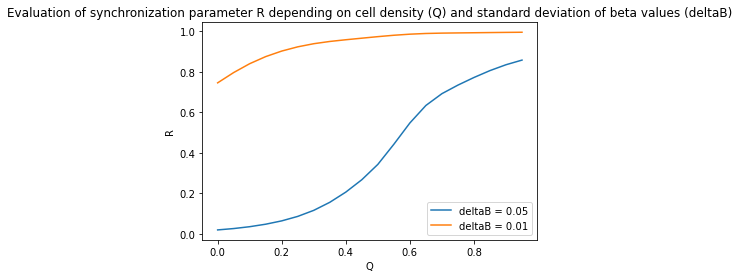

In [12]:
for deltaB in [0.05, 0.01]:
    Q_values = []
    R_values = []
    beta = []
    for i in range(nCell):
        beta.append(random.gauss(1, deltaB))
    for Q in np.arange(0, 1, 0.05):
        ### Matrix initialization
        a = np.zeros((nCell, t))
        b = np.zeros((nCell, t))
        c = np.zeros((nCell, t))

        A = np.zeros((nCell, t))
        B = np.zeros((nCell, t))
        C = np.zeros((nCell, t))

        S = np.zeros((nCell, t))
        Se = np.zeros((nCell, t))

        a[:,0] = 0
        b[:,0] = 50
        c[:,0] = 0

        A[:,0] = 0
        B[:,0] = 0
        C[:,0] = 0

        S[:,0] = 0
        Se[:,0] = 0

        ### Calcul of values
        for j in range(0, t-1):
            for i in range(0, nCell):
                abis = a[i,j] + tau/2 *(-a[i,j]+(alpha/(1+C[i,j]**n)))
                bbis = b[i,j] + tau/2 *(-b[i,j]+(alpha/(1+A[i,j]**n)))
                cbis = c[i,j] + tau/2 *(-c[i,j]+(alpha/(1+B[i,j]**n))+(kappa*S[i,j]/1+S[i,j]))

                Abis = A[i, j] + tau/2 * (beta[i] * (a[i, j] - A[i, j]))
                Bbis = B[i, j] + tau/2 * (beta[i] * (b[i, j] - B[i, j]))
                Cbis = C[i, j] + tau/2 * (beta[i] * (c[i, j] - C[i, j]))

                Sbis = S[i, j] + tau/2 * ((-k_s0 * S[i, j]) + (k_s1 * A[i, j]) - (eta * (S[i, j] - Se[i, j])))

                a[i,j+1] = a[i,j] + tau *(-abis+(alpha/(1+Cbis**n)))
                b[i,j+1] = b[i,j] + tau *(-bbis+(alpha/(1+Abis**n)))
                c[i,j+1] = c[i,j] + tau *(-cbis+(alpha/(1+Bbis**n))+(kappa*Sbis/1+Sbis))

                A[i,j+1] = A[i, j]+ tau*(beta[i]*(abis-Abis))
                B[i,j+1] = B[i, j]+ tau*(beta[i]*(bbis-Bbis))
                C[i,j+1] = C[i, j]+ tau*(beta[i]*(cbis-Cbis))

                S[i,j+1] = S[i,j]+tau*((-k_s0*Sbis)+(k_s1*Abis)-(eta*(Sbis-Se[i,j])))
                
                Se[i,j+1] = Q*np.mean(S[:,j])
                
        Q_values.append(Q)
        R_values.append(R(900, 1000, b, nCell))
    plt.plot(Q_values, R_values, label= str("deltaB = " + str(deltaB)))
    plt.title("Evaluation of synchronization parameter R depending on cell density (Q) and standard deviation of beta values (deltaB)")
    plt.xlabel("Q")
    plt.ylabel("R")
    plt.legend()


### Figure 3B. 

In [17]:
### Constant values
nCell = 100 # Number of cells to use
n = 2 # Hill coefficient
alpha = 112 # Transcription rate in the absence of repressor
kappa = 20 # Maximal contribution to lacI transcription in the presence of saturating amounts of AI
k_s0 = 1 
k_s1 = 0.01
t = 1000 # Time during which the modelisation will be done

tau = 0.04 # Time interval 

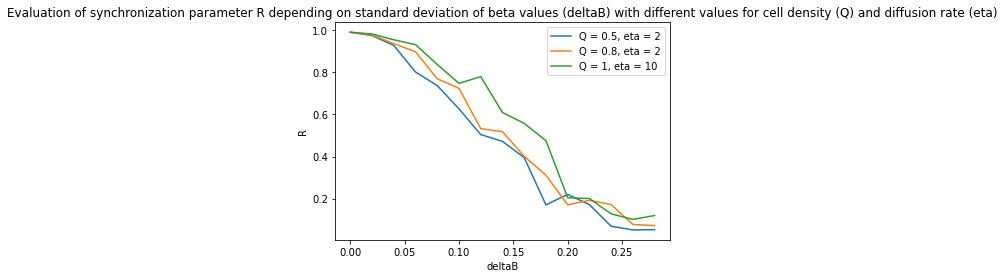

In [18]:
for Q, eta in (0.5, 2), (0.8, 2), (1, 10):
    deltaB_values = []
    R_values = []

    for deltaB in np.arange(0, 0.3, 0.02):
        beta = []
        for i in range(nCell):
            beta.append(random.gauss(1, deltaB))

        ### Matrix initialization
        a = np.zeros((nCell, t))
        b = np.zeros((nCell, t))
        c = np.zeros((nCell, t))

        A = np.zeros((nCell, t))
        B = np.zeros((nCell, t))
        C = np.zeros((nCell, t))

        S = np.zeros((nCell, t))
        Se = np.zeros((nCell, t))

        a[:,0] = 0
        b[:,0] = 50
        c[:,0] = 0

        A[:,0] = 0
        B[:,0] = 0
        C[:,0] = 0

        S[:,0] = 0
        Se[:,0] = 0

        ### Calcul of values
        for j in range(1, t-1):
            for i in range(1, nCell):
                abis = a[i,j] + tau/2 *(-a[i,j]+(alpha/(1+C[i,j]**n)))
                bbis = b[i,j] + tau/2 *(-b[i,j]+(alpha/(1+A[i,j]**n)))
                cbis = c[i,j] + tau/2 *(-c[i,j]+(alpha/(1+B[i,j]**n))+(kappa*S[i,j]/(1+S[i,j])))

                Abis = A[i, j] + tau/2 * (beta[i] * (a[i, j] - A[i, j]))
                Bbis = B[i, j] + tau/2 * (beta[i] * (b[i, j] - B[i, j]))
                Cbis = C[i, j] + tau/2 * (beta[i] * (c[i, j] - C[i, j]))

                Sbis = S[i, j] + tau/2 * ((-k_s0 * S[i, j]) + (k_s1 * A[i, j]) - (eta * (S[i, j] - Se[i, j])))

                a[i,j+1] = a[i,j] + tau *(-abis+(alpha/(1+Cbis**n)))
                b[i,j+1] = b[i,j] + tau *(-bbis+(alpha/(1+Abis**n)))
                c[i,j+1] = c[i,j] + tau *(-cbis+(alpha/(1+Bbis**n))+(kappa*Sbis/(1+Sbis)))

                A[i,j+1] = A[i, j]+ tau*(beta[i]*(abis-Abis))
                B[i,j+1] = B[i, j]+ tau*(beta[i]*(bbis-Bbis))
                C[i,j+1] = C[i, j]+ tau*(beta[i]*(cbis-Cbis))

                S[i,j+1] = S[i,j]+tau*((-k_s0*Sbis)+(k_s1*Abis)-(eta*(Sbis-Se[i,j])))
                
                Se[i,j+1] = Q*np.mean(S[:,j])

        deltaB_values.append(deltaB)
        R_values.append(R(800, 1000, b, nCell))
    plt.plot(deltaB_values, R_values, label = str("Q = " + str(Q) + ", eta = " + str(eta)))
    plt.title("Evaluation of synchronization parameter R depending on standard deviation of beta values (deltaB) with different values for cell density (Q) and diffusion rate (eta)")
    plt.xlabel("deltaB")
    plt.ylabel("R")
    plt.legend()